In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

In [3]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'Spotify_Dataset_V3.csv')
df = pd.read_csv(data_path, delimiter=';')
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Day_in_week"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat),Day_in_week,Month
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141,3.010185,6.268115
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892,2.000477,3.472215
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000,0.000000,1.000000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000,1.000000,3.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000,3.000000,6.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000,5.000000,9.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000,6.000000,12.000000


In [ ]:
# Print main features to latex
# pd.options.display.float_format = '{:.4f}'.format
# ldf = df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Loudness', 'Points (Total)']]
# print(ldf.describe().iloc[1:].to_latex())

## Data visualisation

In [9]:
audio_features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Loudness']

In [13]:
df_features = df[audio_features + ['id', 'Month', 'Day_in_week', 'Points (Total)', 'Points (Ind for each Artist/Nat)']].copy()
df_main_features = df_features[audio_features].copy()
df_main_features.describe()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness
count,651936.0000,651936.0000,651936.0000,651936.0000,651936.0000,651936.0000,651936.0000
mean,0.6977,0.6520,0.1099,0.2307,0.0076,0.5231,-5295.6452
std,0.1332,0.1557,0.0968,0.2307,0.0547,0.2239,2785.2613
min,0.0730,0.0050,0.0220,0.0000,0.0000,0.0260,-34475.0000
25%,0.6170,0.5490,0.0450,0.0480,0.0000,0.3560,-6825.0000
50%,0.7190,0.6710,0.0680,0.1520,0.0000,0.5210,-5206.0000
75%,0.7930,0.7710,0.1360,0.3490,0.0000,0.6960,-3885.0000
max,0.9850,0.9960,0.9660,0.9940,0.9560,0.9820,1509.0000


<Axes: >

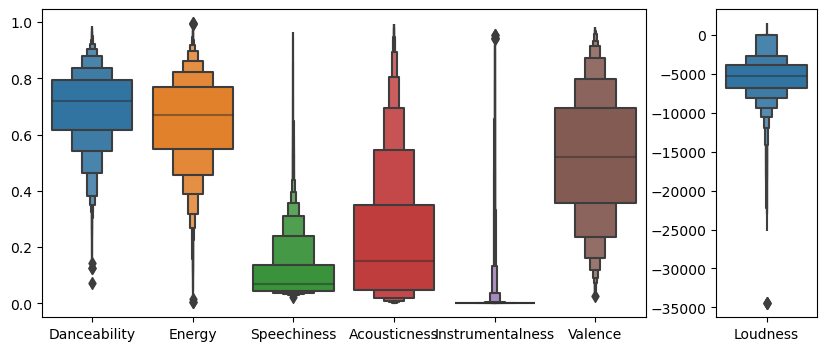

In [14]:
# Box Plot for Audio Features
# plt.figure(figsize=(10, 10))
# plt.subplot(211)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [6, 1]})
sns.boxenplot(df_main_features.drop(columns=["Loudness"]), orient="y", ax=axs[0])

# plt.subplot(212)
sns.boxenplot(df_main_features[["Loudness"]], orient="y", ax=axs[1])

In [15]:
# Multi Histogram Subplots Functions
def plotManyHist(df):
    fig, axs = plt.subplots(math.ceil(len(df.columns)/2), 2, figsize=(11, 7))
    fig.tight_layout()
    for i in range(len(df.columns)):
#         plt.figure(figsize=(15, 4))
        feature = df.columns[i]
        sns.histplot(data=df[feature], bins=100, ax=axs[int(i/2)][i%2])
#         plt.show()

In [16]:
# plt.figure(figsize=(6, 3))
# sns.histplot(df_features["Loudness"], bins=80)

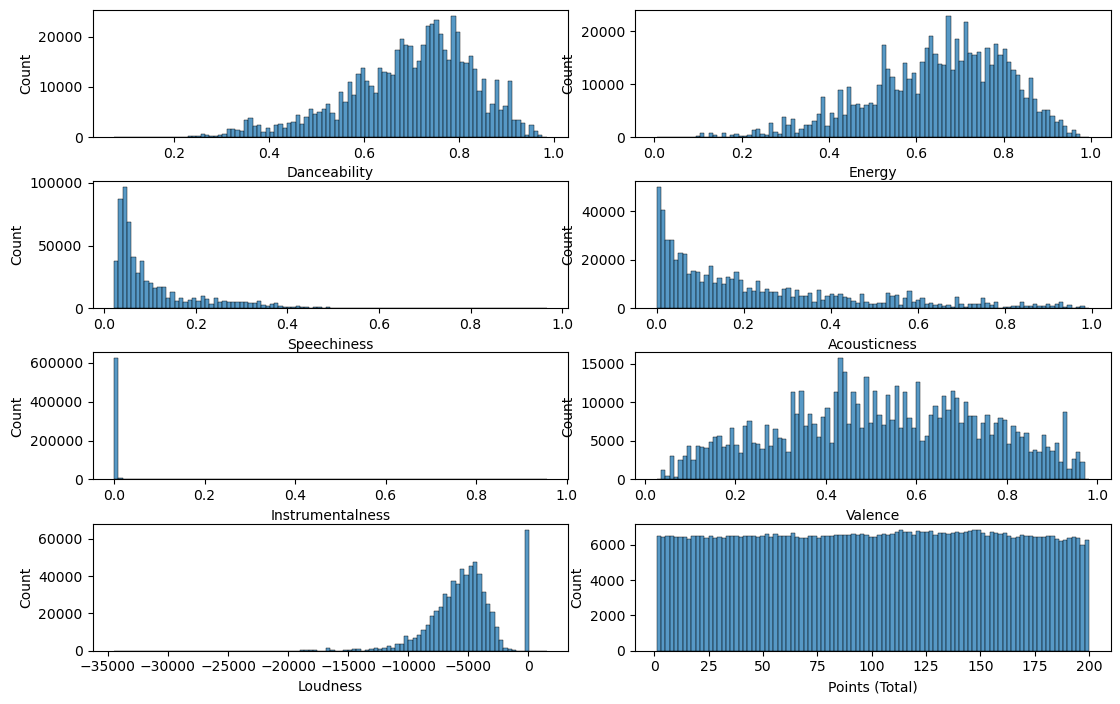

In [19]:
# Hist of focus features
plotManyHist(df_features[audio_features + ["Points (Total)"]])

In [10]:
# sns.scatterplot(data=df_features, x="Loudness", y="Points (Total)")

## Data Cleaning

In [22]:
df_features[df_features["Loudness"] > -1000]["Loudness"].min()

-31.16

In [23]:
# 1. Remove Loundness that values higher that -1000
loundness_outlier_mask = df_main_features["Loudness"] > -1000
df_features_clean_loudness = df_main_features[~loundness_outlier_mask].copy()
df_features_clean_loudness.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness
0,0.6680,0.7580,0.0330,0.4830,0.0000,0.8340,-5176.0000
1,0.6680,0.7580,0.0330,0.4830,0.0000,0.8340,-5176.0000
2,0.6520,0.8000,0.0610,0.1430,0.6290,0.2340,-4019.0000
3,0.8120,0.4790,0.3330,0.2130,0.0000,0.5590,-5678.0000
4,0.8120,0.4790,0.3330,0.2130,0.0000,0.5590,-5678.0000


In [24]:
# 2. Remove outliers using IQR?, outliers = out of this range [Q1-1.5IQR, Q3+1.5IQR]
# lower_quantile = 0.25
# upper_quantile = 0.75

# lower_bounds = df_features_clean_loudness.quantile(lower_quantile)
# upper_bounds = df_features_clean_loudness.quantile(upper_quantile)
# iqr15 = (upper_bounds - lower_bounds) * 1.5

# outliers = ((df_features_clean_loudness < (lower_bounds - iqr15)) | 
#             (df_features_clean_loudness > (upper_bounds + iqr15))).any(axis=1)
# df_clean = (df_features[~loundness_outlier_mask])[~outliers].copy()
df_clean = df_features[~loundness_outlier_mask].copy()
df_clean.describe()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Month,Day_in_week,Points (Total),Points (Ind for each Artist/Nat)
count,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000,587116.0000
mean,0.6967,0.6517,0.1091,0.2314,0.0077,0.5245,-5879.6986,6.2740,3.0103,100.5948,72.5670
std,0.1333,0.1552,0.0970,0.2314,0.0543,0.2233,2276.6680,3.4750,2.0005,57.4627,54.2763
min,0.0730,0.0050,0.0220,0.0000,0.0000,0.0260,-34475.0000,1.0000,0.0000,1.0000,0.2000
25%,0.6170,0.5500,0.0440,0.0490,0.0000,0.3570,-7058.0000,3.0000,1.0000,51.0000,28.0000
50%,0.7150,0.6700,0.0670,0.1530,0.0000,0.5230,-5515.0000,6.0000,3.0000,101.0000,60.0000
75%,0.7910,0.7700,0.1350,0.3480,0.0000,0.6970,-4323.0000,9.0000,5.0000,150.0000,104.0000
max,0.9850,0.9960,0.9660,0.9940,0.9560,0.9820,-1167.0000,12.0000,6.0000,200.0000,200.0000


In [25]:
# 3. drop Instrumentalness?
# df_clean.drop(columns=['Instrumentalness'], inplace=True)

In [26]:
# 4. Normalize loudness?
# scaler = MinMaxScaler() 
# df_clean["Loudness"] = (df_clean["Loudness"]-df_clean["Loudness"].min())/df_clean["Loudness"].std()

In [27]:
# remove duplicate songs in a day
df_clean = df_clean.drop_duplicates()

In [28]:
# Data left after cleaning
print(df_features.shape, "->", df_clean.shape)

(651936, 12) -> (397093, 12)


### - Visualise cleaned data

In [29]:
# plt.figure(figsize=(6, 3))
# sns.histplot(df_clean["Loudness"], bins=80)

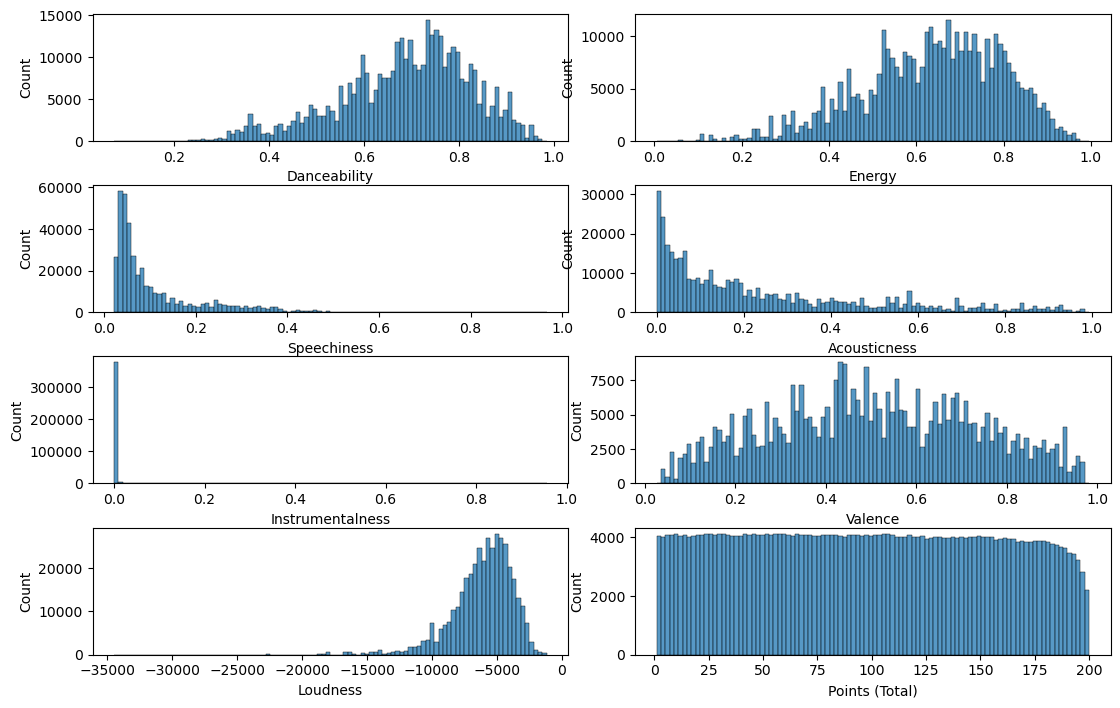

In [30]:
# Hist of focus features, after cleaned
plotManyHist(df_clean[audio_features + ["Points (Total)"]])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Danceability'),
  Text(1.5, 0, 'Energy'),
  Text(2.5, 0, 'Speechiness'),
  Text(3.5, 0, 'Acousticness'),
  Text(4.5, 0, 'Instrumentalness'),
  Text(5.5, 0, 'Valence'),
  Text(6.5, 0, 'Loudness'),
  Text(7.5, 0, 'Points (Total)')])

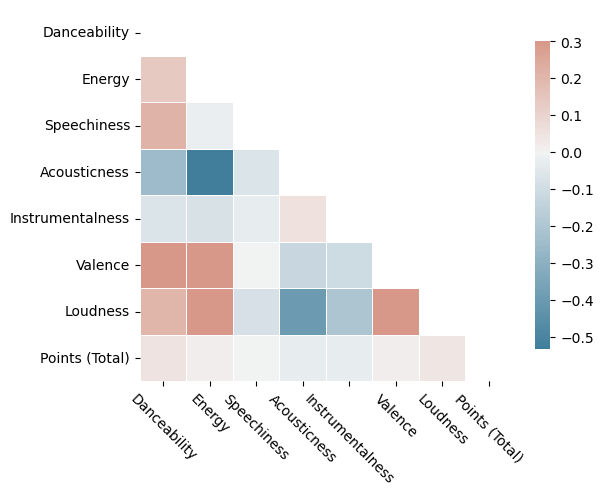

In [31]:
corr = df_clean.drop(columns=["id", "Month", "Day_in_week", "Points (Ind for each Artist/Nat)"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# may use "abs(corr)"
sns.heatmap((corr), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.xticks(rotation = -45)

In [32]:
# sns.scatterplot(data=df_clean, x="Loudness", y="Points (Total)")

### - Corr btw features & Points (Total) filtered by day in week

In [33]:
df_raw = df_clean.drop(columns=["id", "Month", "Points (Ind for each Artist/Nat)"]).copy()
df_corr_day = pd.DataFrame()
# day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for day in sorted(df_raw["Day_in_week"].unique()):
    df_corr = df_raw[df_raw["Day_in_week"] == day].drop(columns="Day_in_week").corr()
    df_corr_day[day_name[day]] = df_corr[["Points (Total)"]].T.drop(columns="Points (Total)").iloc[0]

df_corr_day

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Danceability,0.0475,0.0476,0.0510,0.0535,0.0431,0.0472,0.0489
Energy,0.0202,0.0203,0.0196,0.0174,0.0056,0.0028,0.0161
Speechiness,-0.0031,-0.0038,-0.0030,-0.0024,-0.0053,-0.0023,-0.0021
Acousticness,-0.0311,-0.0319,-0.0295,-0.0274,-0.0190,-0.0207,-0.0301
Instrumentalness,-0.0299,-0.0306,-0.0295,-0.0293,-0.0235,-0.0282,-0.0242
Valence,0.0204,0.0196,0.0188,0.0168,0.0115,0.0094,0.0117
Loudness,0.0430,0.0448,0.0482,0.0463,0.0295,0.0350,0.0442


Text(0.5, 1.0, 'Correlation between features and points filtered by day in a week')

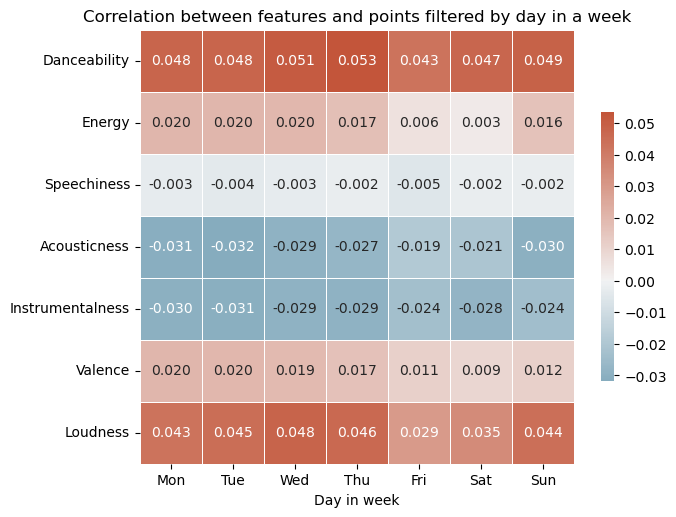

In [34]:
# Draw the heatmap
f, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap((df_corr_day), cmap=cmap, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.3f')

plt.xlabel("Day in week")
plt.title("Correlation between features and points filtered by day in a week")

In [35]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# sns.heatmap(ax=axes[0], data=df_corr_day[["Monday"]], cmap=cmap, center=0, square=True,
#             linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.3f')
# sns.heatmap(ax=axes[1], data=df_corr_day[["Tuesday"]], cmap=cmap, center=0, square=True,
#             linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.3f')
# sns.heatmap(ax=axes[2], data=df_corr_day[["Wednesday"]], cmap=cmap, center=0, square=True,
#             linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.3f')

### - Corr btw features & Points (Total) filtered by month

In [36]:
df_raw = df_clean.drop(columns=['id', "Day_in_week", "Points (Ind for each Artist/Nat)"]).copy()
df_corr_month = pd.DataFrame()

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in sorted(df_raw["Month"].unique()):
    df_corr = df_raw[df_raw["Month"] == month].drop(columns="Month").corr()
    df_corr_month[month_name[month-1]] = df_corr[["Points (Total)"]].T.drop(columns="Points (Total)").iloc[0]

df_corr_month

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Danceability,0.0383,0.0505,0.0610,0.0521,0.0505,0.0852,0.0944,0.0498,0.0462,0.0493,0.0347,-0.0174
Energy,0.0094,0.0132,0.0000,-0.0068,0.0152,0.0073,0.0272,0.0268,0.0703,0.0212,0.0194,-0.0139
Speechiness,-0.0155,-0.0048,-0.0053,0.0260,0.0240,0.0309,-0.0373,-0.0130,0.0318,0.0020,-0.0225,-0.0666
Acousticness,-0.0356,-0.0296,-0.0219,-0.0363,-0.0174,-0.0006,-0.0110,-0.0105,-0.0737,-0.0633,-0.0488,0.0140
Instrumentalness,-0.0014,-0.0378,-0.0125,-0.0312,-0.0449,-0.0216,-0.0115,-0.0267,-0.0424,-0.0581,-0.0560,0.0044
Valence,-0.0154,-0.0079,-0.0036,-0.0016,0.0285,0.0535,0.0673,0.0407,0.0274,0.0092,-0.0215,0.0214
Loudness,0.0546,0.0307,0.0230,0.0069,0.0341,0.0493,0.0452,0.0636,0.0983,0.0725,0.0619,-0.0105


Text(0.5, 1.0, 'Correlation between features and points filtered by month')

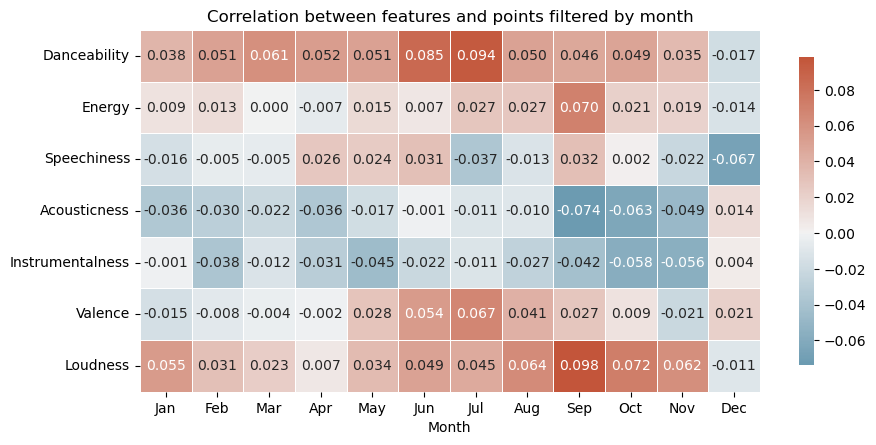

In [78]:
# Draw the heatmap
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap((df_corr_month), cmap=cmap, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.3f')

plt.xlabel("Month")
plt.title("Correlation between features and points filtered by month")

# Export cleaned dataset to csv

In [51]:
# df_clean.to_csv("cleaned_data_with_id.csv")

In [52]:
df_clean.shape

(397093, 12)

## Clustering by audio feature (Draft)

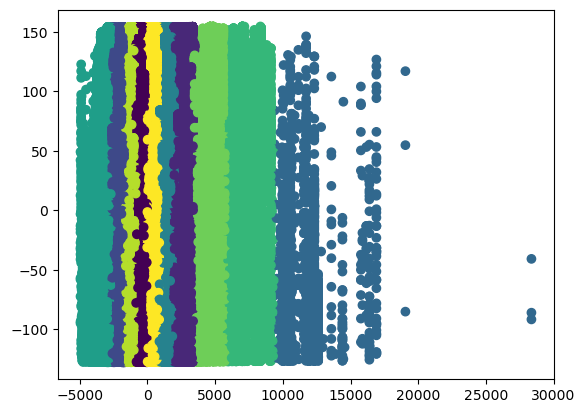

In [59]:
df_cluster_original = df_clean.drop(columns=["Day_in_week", "Month"]).copy()
# df_cluster_original = df_main_features.copy()

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto")
kmeans.fit(df_cluster_original)

df_cluster = df_cluster_original.copy()
df_cluster['cluster'] = kmeans.labels_
labels = kmeans.labels_

pca = PCA(n_components=4)  # Reduce to 2 dimensions
X_2d = pca.fit_transform(df_cluster_original)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')

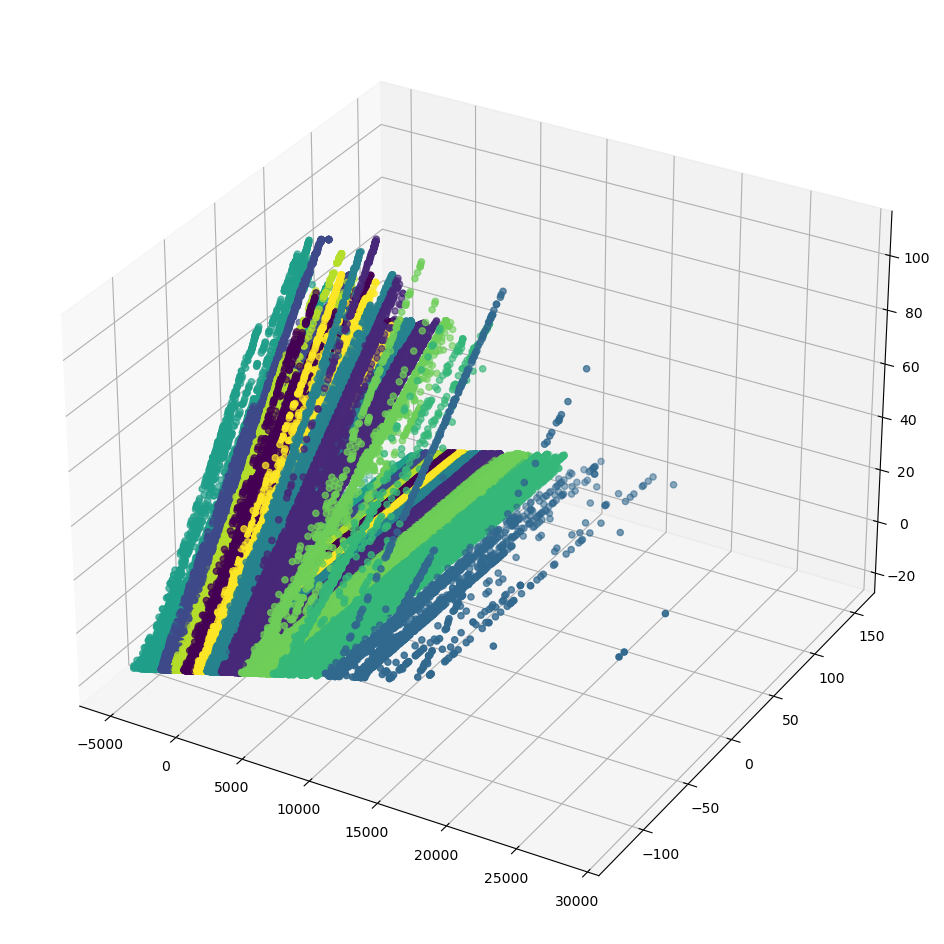

In [60]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_2d[:, 0], X_2d[:, 1], X_2d[:, 2], c=labels)
plt.show()

## Explore data for each cluster

In [254]:
# Filter songs based on a specific cluster
pd.options.display.max_colwidth = 100
df.filter(items=df_cluster[df_cluster["cluster"] == 3].index, axis=0)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Day_in_week,Month
274,186,I AM,IVE,2023-05-29,0.683,0.875,-4866.0,0.055,0.012,0.0,...,IVE,Nationality 1,South Korea,Asia,15,15.0,70t7Q6AYG6ZgTYmJWcnkUM,https://open.spotify.com/track/70t7Q6AYG6ZgTYmJWcnkUM,Monday,5
277,189,Shut up My Moms Calling,Hotel Ugly,2023-05-29,0.485,0.409,-10711.0,0.101,0.325,0.0,...,Hotel Ugly,Nationality 1,United States,Anglo-America,12,12.0,3hxIUxnT27p5WcmjGUXNwx,https://open.spotify.com/track/3hxIUxnT27p5WcmjGUXNwx,Monday,5
278,190,Lover,Taylor Swift,2023-05-29,0.359,0.543,-7582.0,0.092,0.492,0.0,...,Taylor Swift,Nationality 1,United States,Anglo-America,11,11.0,1dGr1c8CrMLDpV6mPbImSI,https://open.spotify.com/track/1dGr1c8CrMLDpV6mPbImSI,Monday,5
279,191,Demons,Imagine Dragons,2023-05-29,0.505,0.710,-3015.0,0.032,0.190,0.0,...,Imagine Dragons,Nationality 1,United States,Anglo-America,10,10.0,5qaEfEh1AtSdrdrByCP7qR,https://open.spotify.com/track/5qaEfEh1AtSdrdrByCP7qR,Monday,5
280,192,Shivers,Ed Sheeran,2023-05-29,0.788,0.859,-2724.0,0.086,0.281,0.0,...,Ed Sheeran,Nationality 1,United Kingdom,Europe,9,9.0,3xWGA8pa0IKFI7IMPri4P0,https://open.spotify.com/track/3xWGA8pa0IKFI7IMPri4P0,Monday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651929,195,Taped up Heart (feat. Clara Mae),KREAM,2017-01-01,0.675,0.937,-3525.0,0.051,0.152,0.0,...,KREAM,Nationality 1,Norway,Europe,6,6.0,26hcyzSE154xMZCbFdtInA,https://open.spotify.com/track/26hcyzSE154xMZCbFdtInA,Sunday,1
651930,196,White Iverson,Post Malone,2017-01-01,0.675,0.562,-7678.0,0.035,0.233,0.0,...,Post Malone,Nationality 1,United States,Anglo-America,5,5.0,6eT7xZZlB2mwyzJ2sUKG6w,https://open.spotify.com/track/6eT7xZZlB2mwyzJ2sUKG6w,Sunday,1
651933,199,Secrets,The Weeknd,2017-01-01,0.665,0.771,-5779.0,0.053,0.016,0.0,...,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLcLl31h2p,Sunday,1
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.0,...,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7nnXoXA5O,Sunday,1


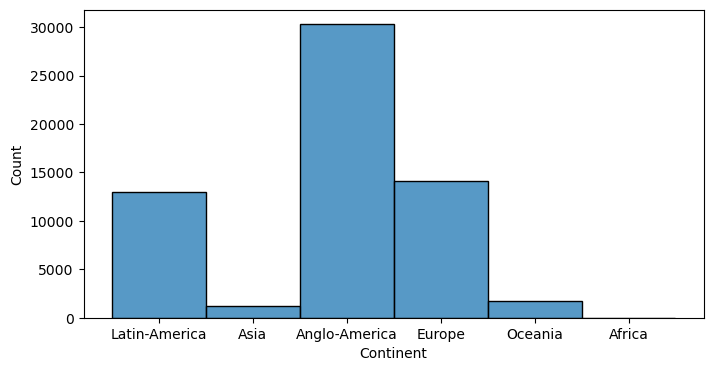

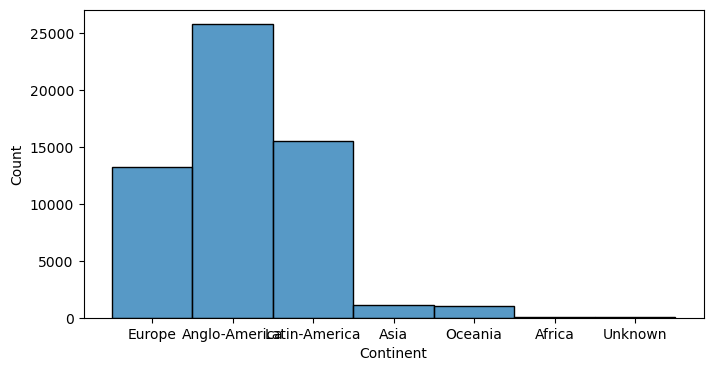

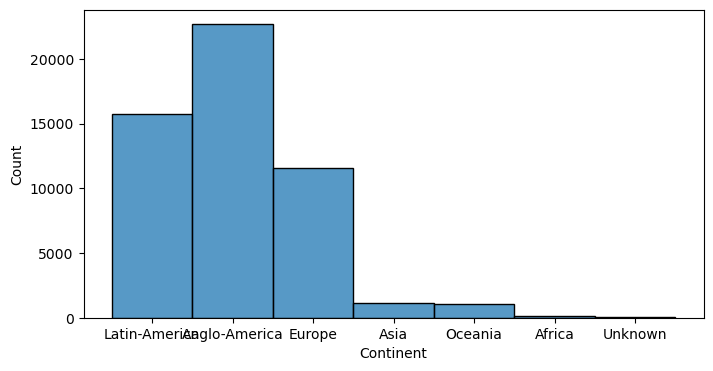

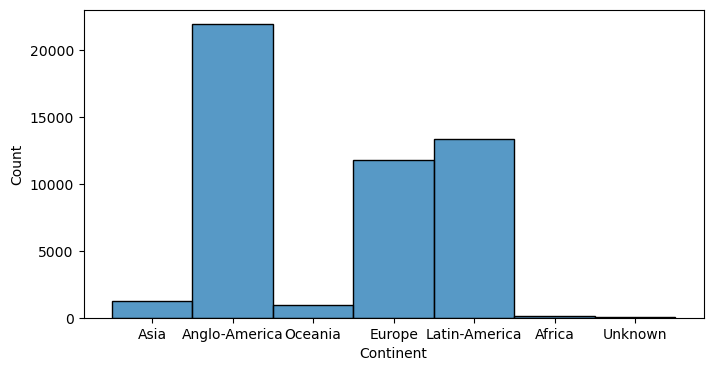

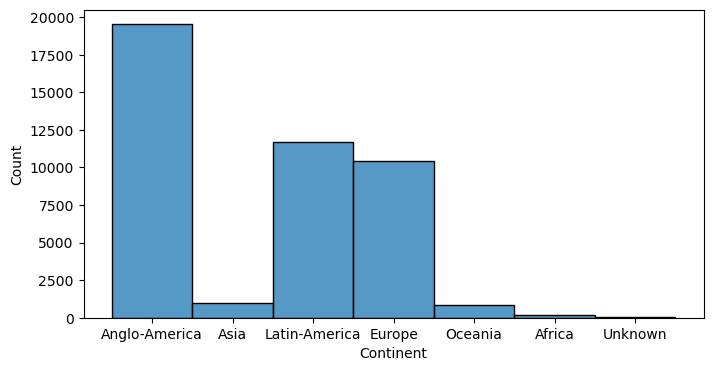

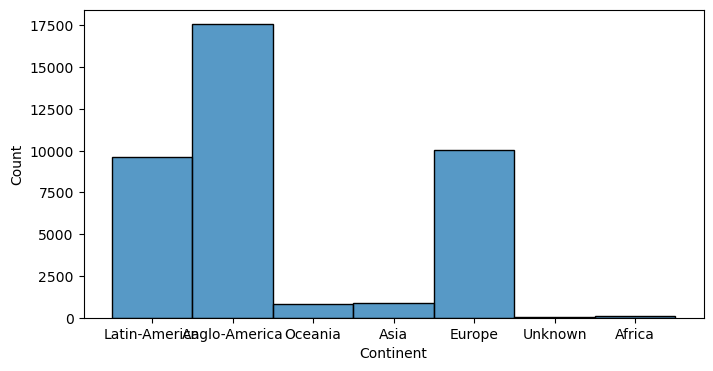

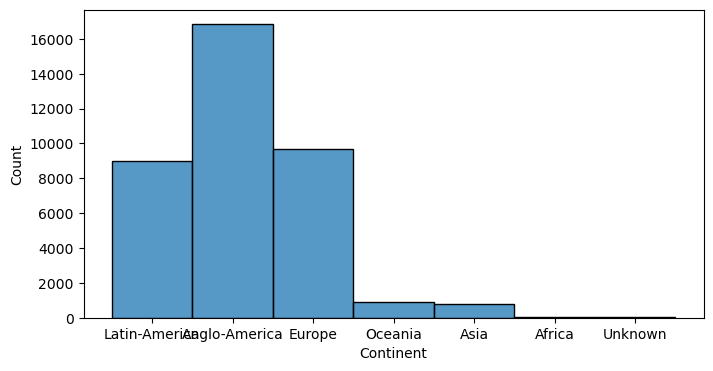

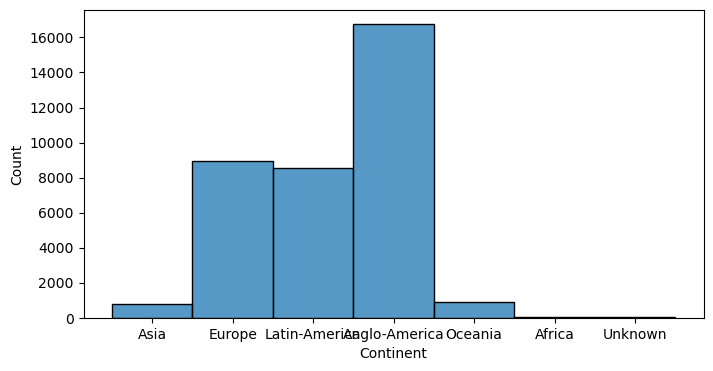

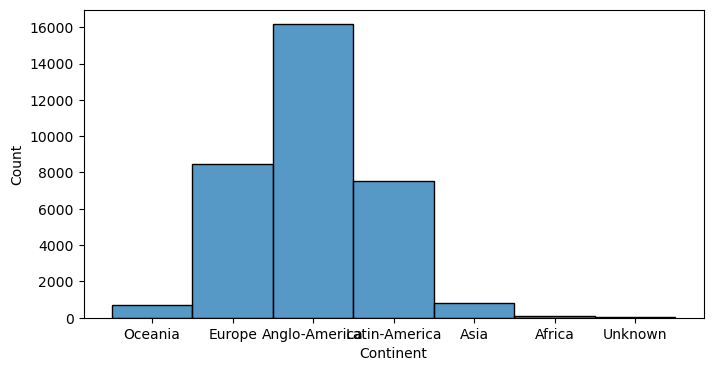

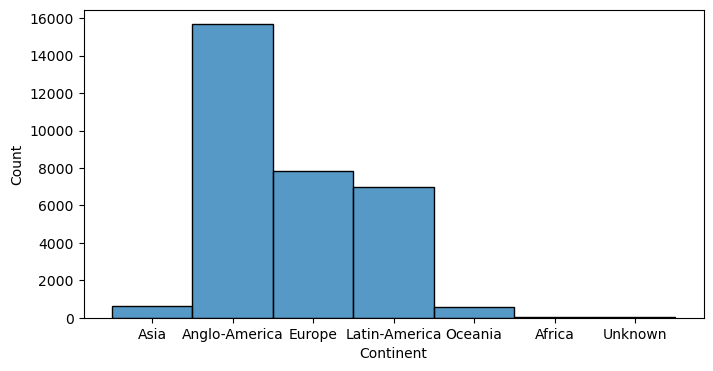

In [196]:
for cluster in df_cluster["cluster"].unique():
    plt.figure(figsize=(8,4))
    sns.histplot(df.filter(items=df_cluster[df_cluster["cluster"] == cluster].index, axis=0)["Continent"])
    plt.show()